Harsh Karia <br>
GitHub Username: harshkaria <br>
USC ID: 5860082592

In [242]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
import graphviz
from skmultilearn.problem_transform import LabelPowerset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import math
import functools
from IPython.display import IFrame, HTML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

from sklearn import metrics


In [151]:
# Importing the dataset


cols = pd.read_csv("../data/aps_failure_training_set.csv", skiprows=19, nrows=1).columns
data_train = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=21)
data_train.columns = cols
data_test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=21)
data_test.columns = cols

frames = [data_train, data_test]

data = pd.concat(frames)

response_data = data.iloc[:, 0]


print(data)
print(response_data)


      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   33058     na           0     na      0      0      0      0   
1       neg   41040     na         228    100      0      0      0      0   
2       neg      12      0          70     66      0     10      0      0   
3       neg   60874     na        1368    458      0      0      0      0   
4       neg   38312     na  2130706432    218      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15994   neg   81852     na  2130706432    892      0      0      0      0   
15995   neg      18      0          52     46      8     26      0      0   
15996   neg   79636     na        1670   1518      0      0      0      0   
15997   neg     110     na          36     32      0      0      0      0   
15998   neg       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  

In [141]:
data = data.drop(['class'], axis=1)

In [142]:
response_data.columns = [['class']]

In [152]:
np_data = np.asarray(data)
np_data[data=='na'] = np.nan
data = pd.DataFrame(np_data, columns=data.columns)

In [153]:
print(data)

      class aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg  33058    NaN           0    NaN      0      0      0      0   
1       neg  41040    NaN         228    100      0      0      0      0   
2       neg     12      0          70     66      0     10      0      0   
3       neg  60874    NaN        1368    458      0      0      0      0   
4       neg  38312    NaN  2130706432    218      0      0      0      0   
...     ...    ...    ...         ...    ...    ...    ...    ...    ...   
75993   neg  81852    NaN  2130706432    892      0      0      0      0   
75994   neg     18      0          52     46      8     26      0      0   
75995   neg  79636    NaN        1670   1518      0      0      0      0   
75996   neg    110    NaN          36     32      0      0      0      0   
75997   neg      8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0         

In [156]:
col = data.columns[0]
data[col] = data[col].map({'pos': 1, 'neg': 0})

### 1b - Data Imputation

In [157]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)

data = pd.DataFrame(data=imp.transform(data), columns=data.columns)
print(data)

       class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0        0.0  33058.0  0.725602  0.000000e+00  150635.227833     0.0     0.0   
1        0.0  41040.0  0.725602  2.280000e+02     100.000000     0.0     0.0   
2        0.0     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
3        0.0  60874.0  0.725602  1.368000e+03     458.000000     0.0     0.0   
4        0.0  38312.0  0.725602  2.130706e+09     218.000000     0.0     0.0   
...      ...      ...       ...           ...            ...     ...     ...   
75993    0.0  81852.0  0.725602  2.130706e+09     892.000000     0.0     0.0   
75994    0.0     18.0  0.000000  5.200000e+01      46.000000     8.0    26.0   
75995    0.0  79636.0  0.725602  1.670000e+03    1518.000000     0.0     0.0   
75996    0.0    110.0  0.725602  3.600000e+01      32.000000     0.0     0.0   
75997    0.0      8.0  0.000000  6.000000e+00       4.000000     2.0     2.0   

       ag_000  ag_001  ag_002  ...    e

### 1ii - Calculating Coefficient of Variation for each feature

In [97]:
def calculate_cv(df):
    coeffs = []
    for col in df.columns:
        coeffs.append(np.std(df[col])/np.mean(df[col]))
    return coeffs

In [98]:
coeffs = calculate_cv(data)
cols = []
for col in data.columns:
    cols.append(col)
summary_df_dict = {'Feature': cols,
              'Variance Coefficient': coeffs
             }

summary_df = pd.DataFrame(summary_df_dict)
summary_df.set_index('Feature')

,Variance Coefficient
Feature,
aa_000,4.328592
ab_000,2.178158
ac_000,2.167710
ad_000,206.715633
ae_000,22.293204
...,...
ee_007,4.885028
ee_008,3.334991
ee_009,5.753816


### 1iii - Correlation Matrix

In [99]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

### 1iv - Feature Selection based on CV

In [100]:
scatters = []
for i in range(len(data.columns)):
    scatters.append({
        'column': data.columns[i],
        'coeff': coeffs[i]
    })

scatters.sort(key = lambda x: x['coeff'], reverse=True)


# Get a list of the columns of the highest sqrt(170) features
ftrs = []
for ftr_i in range(0, math.floor(math.sqrt(170))):
    ftr = scatters[ftr_i]
    ftrs.append(ftr['column'])


In [101]:
print(ftrs)

['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000', 'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009']


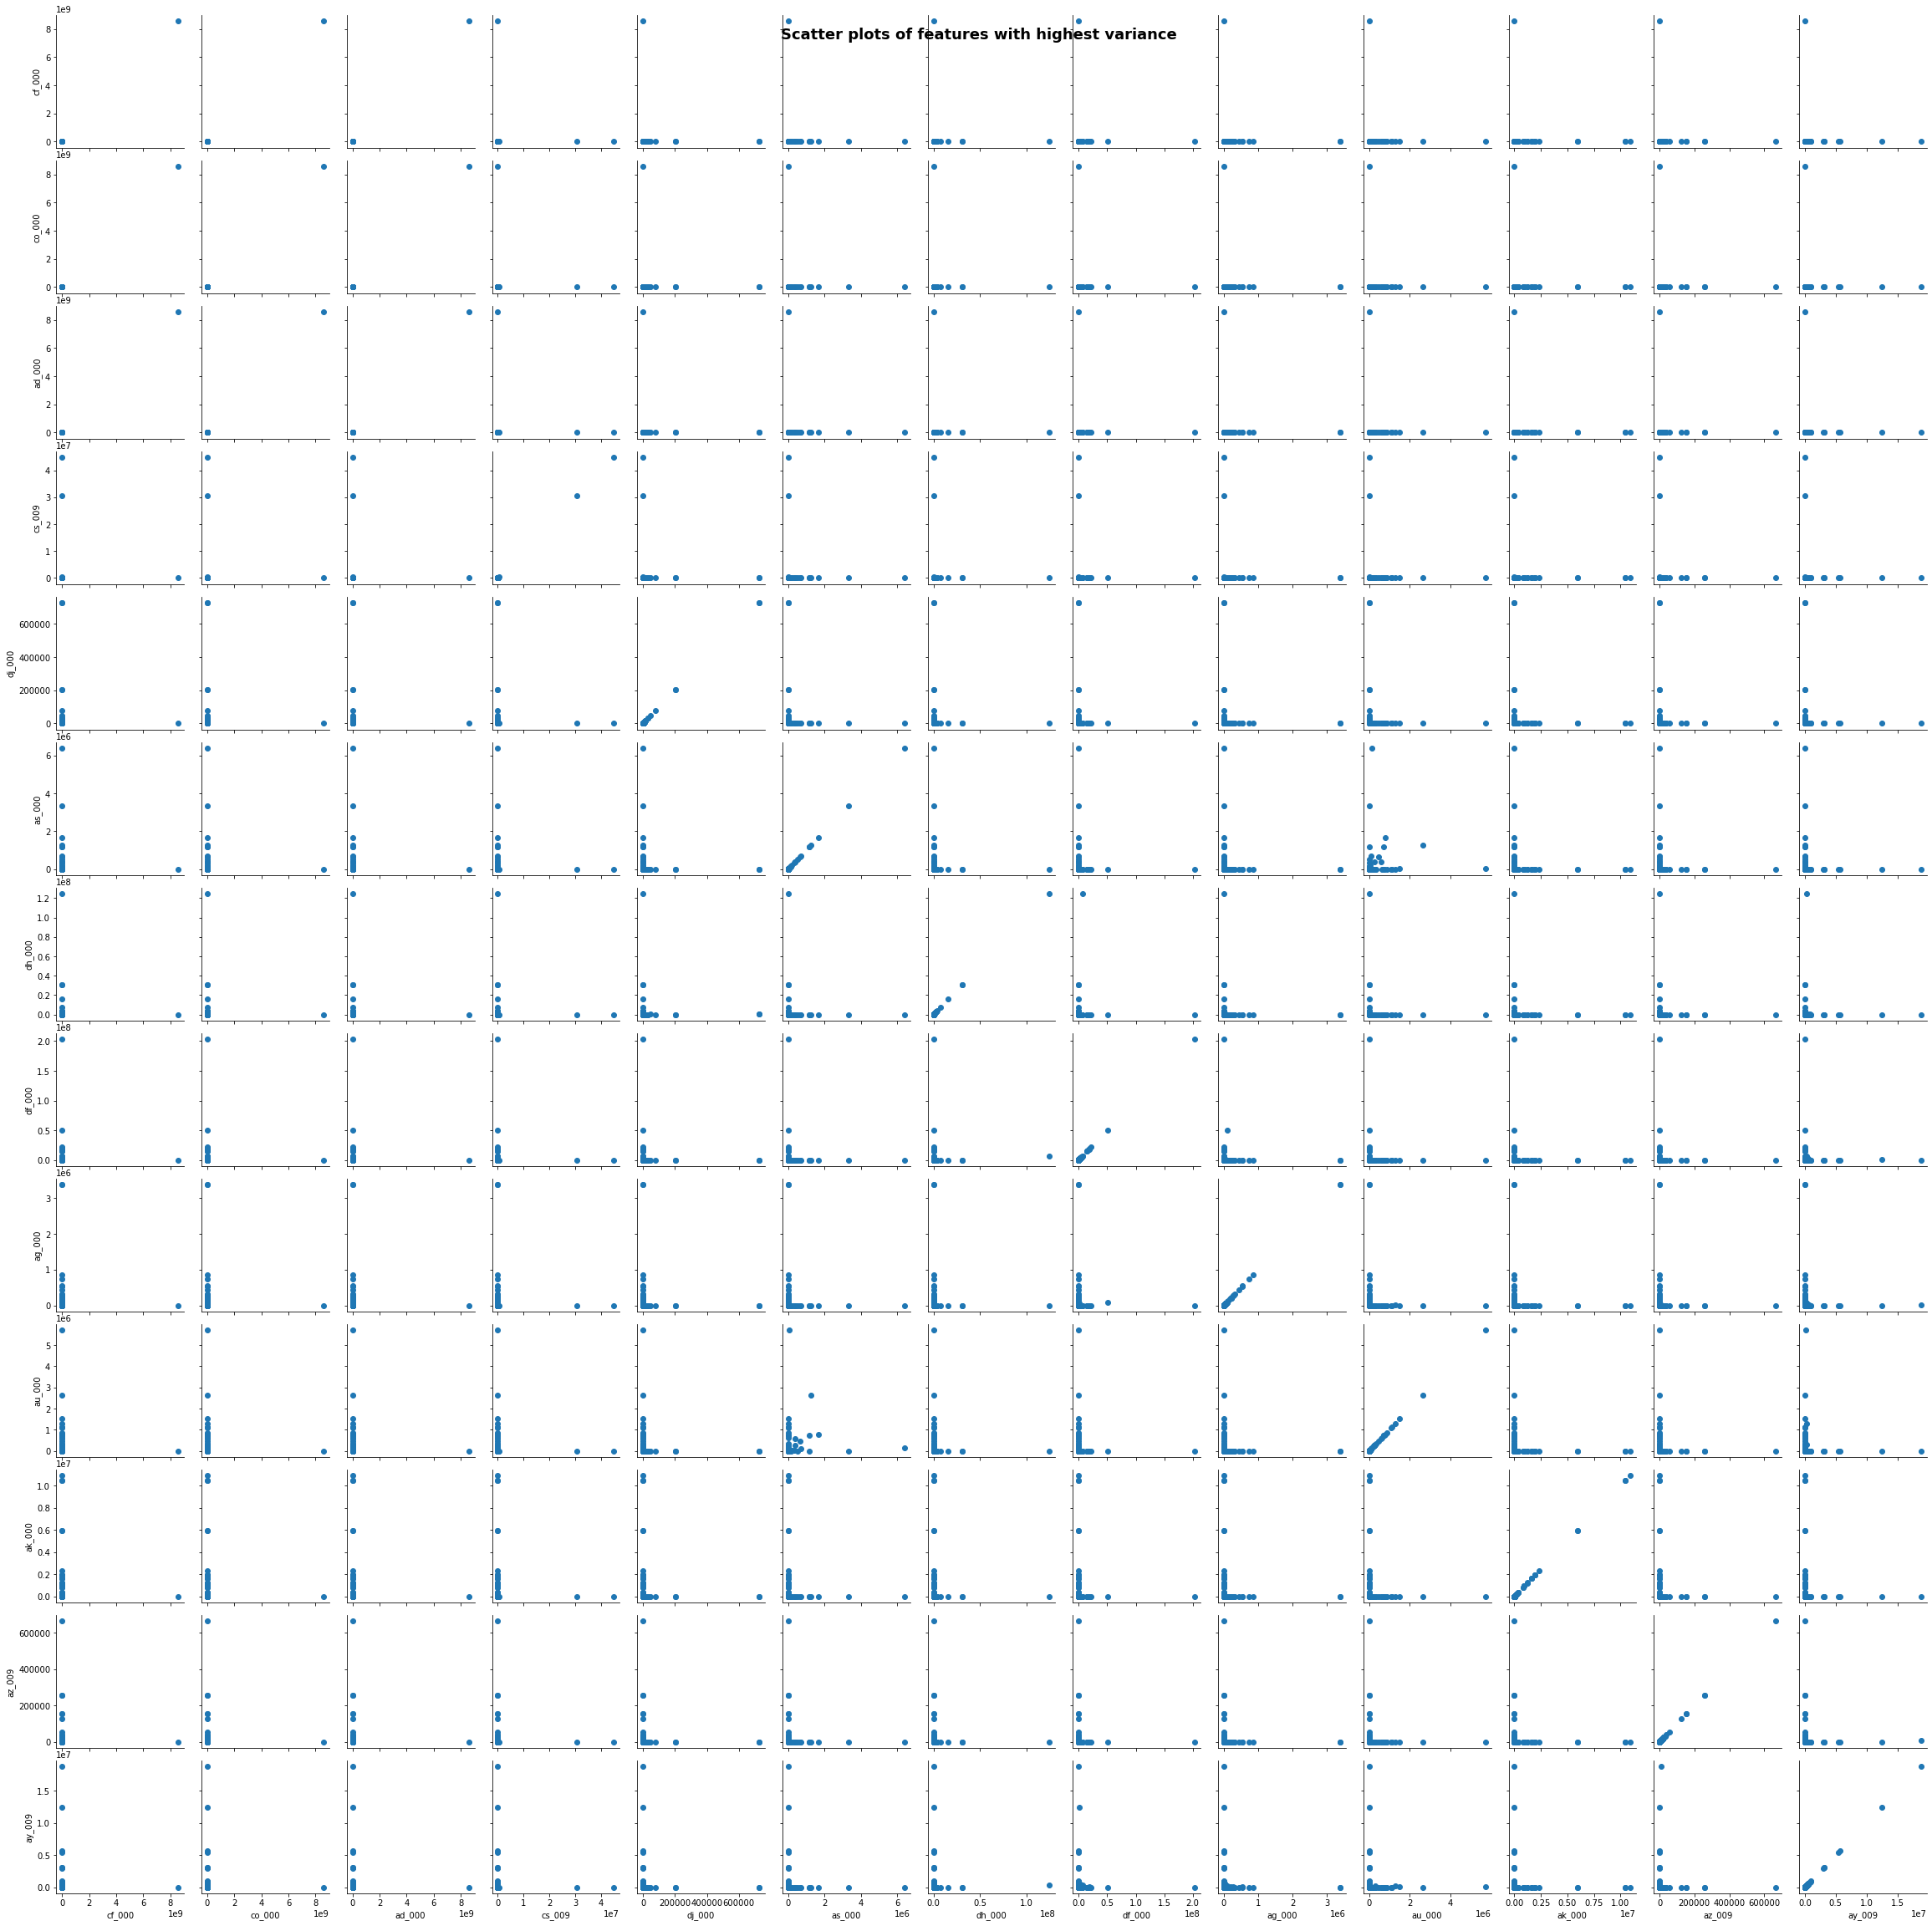

In [102]:
df_best_ftrs = data[ftrs]
df_best_ftrs.columns = df_best_ftrs.columns.get_level_values(0)
plt_ftrs = sns.PairGrid(df_best_ftrs, vars = df_best_ftrs.columns)
plt_ftrs.fig.suptitle("Scatter plots of features with highest variance", fontsize=18, weight='bold')
plt_ftrs.map(plt.scatter)
plt.show()


We can conclude that among the features with the highest CV, they have trivial correlation with one another.

### 1v - Number of Positive and Negative Data

In [103]:
pos_class = response_data.loc[response_data == 'pos']
neg_class = response_data.loc[response_data == 'neg']

print(f'There are {pos_class.shape[0]} positive class samples')
print(f'There are {neg_class.shape[0]} negative class samples')

There are 1375 positive class samples
There are 74623 negative class samples


The dataset is imbalanced since there are more negative samples than positive ones

## 1c - Random Forest Training

### Data Splitting

In [121]:
print(data)

        aa_000    ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0      33058.0  0.725602  0.000000e+00  150635.227833     0.0     0.0     0.0   
1      41040.0  0.725602  2.280000e+02     100.000000     0.0     0.0     0.0   
2         12.0  0.000000  7.000000e+01      66.000000     0.0    10.0     0.0   
3      60874.0  0.725602  1.368000e+03     458.000000     0.0     0.0     0.0   
4      38312.0  0.725602  2.130706e+09     218.000000     0.0     0.0     0.0   
...        ...       ...           ...            ...     ...     ...     ...   
75993  81852.0  0.725602  2.130706e+09     892.000000     0.0     0.0     0.0   
75994     18.0  0.000000  5.200000e+01      46.000000     8.0    26.0     0.0   
75995  79636.0  0.725602  1.670000e+03    1518.000000     0.0     0.0     0.0   
75996    110.0  0.725602  3.600000e+01      32.000000     0.0     0.0     0.0   
75997      8.0  0.000000  6.000000e+00       4.000000     2.0     2.0     0.0   

       ag_001  ag_002  ag_0

In [158]:
train, test = train_test_split(data, test_size=0.2)

In [159]:
print(train)
print(test)


       class    aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
3498     0.0   10362.0  0.725602  0.000000e+00  150635.227833     0.0     0.0   
27578    0.0      36.0  0.725602  4.000000e+01      30.000000     0.0     0.0   
46729    0.0     284.0  0.725602  4.200000e+01      38.000000     0.0     0.0   
1768     0.0     336.0  0.000000  2.400000e+01      18.000000     0.0     0.0   
22673    0.0      84.0  2.000000  5.600000e+01      30.000000     2.0     6.0   
...      ...       ...       ...           ...            ...     ...     ...   
53528    0.0   48006.0  0.725602  2.130706e+09     148.000000     0.0     0.0   
55152    0.0  190522.0  0.725602  5.820000e+02     508.000000     0.0     0.0   
53594    0.0   43648.0  0.725602  5.160000e+02     494.000000     0.0     0.0   
8280     0.0   31584.0  0.725602  4.200000e+02     402.000000     0.0     0.0   
33094    0.0   41724.0  0.725602  1.600000e+02     350.000000     0.0     0.0   

       ag_000  ag_001  ag_0

In [160]:
# Predictors and responses
train_X = train.drop(train.columns[0], axis=1)
train_Y = train.drop(train.columns[1:], axis=1)
test_X = test.drop(test.columns[0], axis=1)
test_Y = test.drop(test.columns[1:], axis=1)

In [161]:
print(train_X)
print(train_Y)

         aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
3498    10362.0  0.725602  0.000000e+00  150635.227833     0.0     0.0   
27578      36.0  0.725602  4.000000e+01      30.000000     0.0     0.0   
46729     284.0  0.725602  4.200000e+01      38.000000     0.0     0.0   
1768      336.0  0.000000  2.400000e+01      18.000000     0.0     0.0   
22673      84.0  2.000000  5.600000e+01      30.000000     2.0     6.0   
...         ...       ...           ...            ...     ...     ...   
53528   48006.0  0.725602  2.130706e+09     148.000000     0.0     0.0   
55152  190522.0  0.725602  5.820000e+02     508.000000     0.0     0.0   
53594   43648.0  0.725602  5.160000e+02     494.000000     0.0     0.0   
8280    31584.0  0.725602  4.200000e+02     402.000000     0.0     0.0   
33094   41724.0  0.725602  1.600000e+02     350.000000     0.0     0.0   

       ag_000  ag_001  ag_002    ag_003  ...    ee_002    ee_003    ee_004  \
3498      0.0     0.0     0.0    

In [164]:
model = RandomForestClassifier(oob_score=True)
model.fit(train_X, train_Y.values.ravel())


RandomForestClassifier(oob_score=True)

In [169]:
train_y_pred = model.predict(train_X)
cfn_scores = metrics.confusion_matrix(train_Y, train_y_pred)

Text(0.5, 257.44, 'Predicted label')

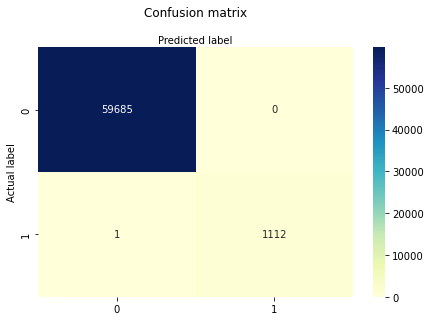

In [172]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfn_scores), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [174]:
probabilities = model.predict_proba(train_X)
preds = probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(train_Y, preds)
roc_auc = metrics.auc(fpr, tpr)
train_auc = roc_auc

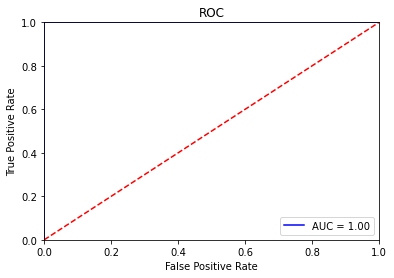

In [175]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [178]:
tn, fp, fn, tp = cfn_scores.copy().reshape(-1)
accuracy = (tp+tn)/(tp + fp + tn + fn)
train_accuracy = accuracy

train_misclassifications = cfn_scores[0][1] + cfn_scores[1][0]
print(f'Training Misclassifications: {train_misclassifications}')

Training Misclassifications: 1


In [180]:
test_y_pred = model.predict(test_X)
cfn_scores = metrics.confusion_matrix(test_Y, test_y_pred)

Text(0.5, 257.44, 'Predicted label')

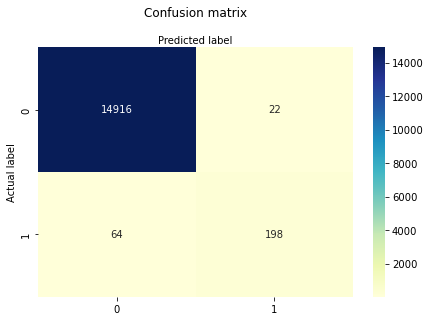

In [181]:
 # name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfn_scores), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [182]:
probabilities = model.predict_proba(test_X)
preds = probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_Y, preds)
roc_auc = metrics.auc(fpr, tpr)
test_auc = roc_auc

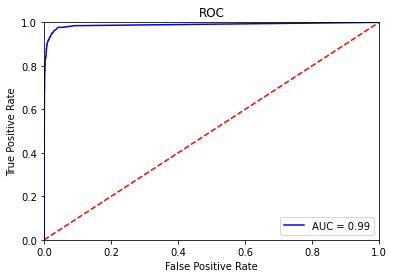

In [183]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [184]:
tn, fp, fn, tp = cfn_scores.copy().reshape(-1)
accuracy = (tp + tn)/(tp + fp + tn + fn)
test_accuracy = accuracy

test_misclassifications = cfn_scores[0][1] + cfn_scores[1][0]
print(f'Test Set Misclassifications: {test_misclassifications}')

Test Set Misclassifications: 86


In [188]:
summary = {
                'Data':  ['Train', 'Test'],
                'Misclassifications': [train_misclassifications, test_misclassifications],
                'Error Rate': [f'{(1-train_accuracy)*100}%', f'{(1-test_accuracy)*100}%'],
                'AUC': [train_auc, test_auc]
               }

summary_df = pd.DataFrame(summary)
summary_df.set_index('Data')

,Misclassifications,Error Rate,AUC
Data,,,
Train,1,0.0016447909470751476%,1.000000
Test,86,0.5657894736842084%,0.988714


In [190]:
oob_error = 1 - model.oob_score_


summary_data = {
                'Parameter':  ['Test Error', 'Out of Bag Error'],
                'Value': [f'{(1-test_accuracy)*100}%', f'{oob_error*100}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameter')

,Value
Parameter,
Test Error,0.5657894736842084%
Out of Bag Error,0.6315997236751247%


### 1d - Random Forest Class Imbalance

In [192]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced')
model.fit(train_X, train_Y)

RandomForestClassifier(class_weight='balanced', oob_score=True)

In [193]:
train_y_pred = model.predict(train_X)
cfn_scores = metrics.confusion_matrix(train_Y, train_y_pred)

Text(0.5, 257.44, 'Predicted label')

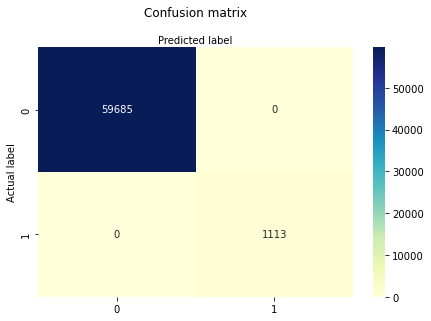

In [194]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfn_scores), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [195]:
probabilities = model.predict_proba(train_X)
preds = probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(train_Y, preds)
roc_auc = metrics.auc(fpr, tpr)
train_auc = roc_auc

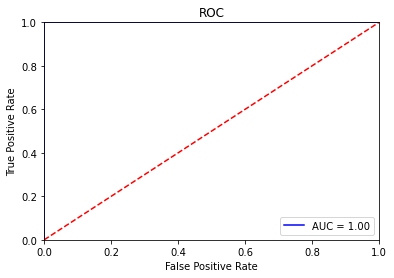

In [196]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [197]:
tn, fp, fn, tp = cfn_scores.copy().reshape(-1)
accuracy = (tp+tn)/(tp + fp + tn + fn)
train_accuracy = accuracy

train_misclassifications = cfn_scores[0][1] + cfn_scores[1][0]
print(f'Training Misclassifications: {train_misclassifications}')

Training Misclassifications: 0


In [198]:
test_y_pred = model.predict(test_X)
cfn_scores = metrics.confusion_matrix(test_Y, test_y_pred)

Text(0.5, 257.44, 'Predicted label')

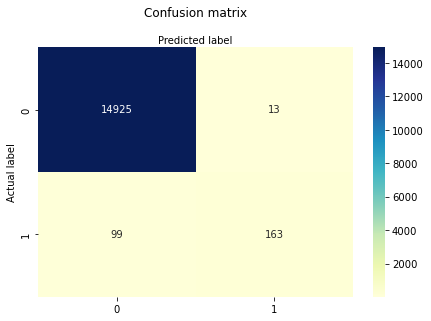

In [199]:
 # name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfn_scores), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [200]:
probabilities = model.predict_proba(test_X)
preds = probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_Y, preds)
roc_auc = metrics.auc(fpr, tpr)
test_auc = roc_auc

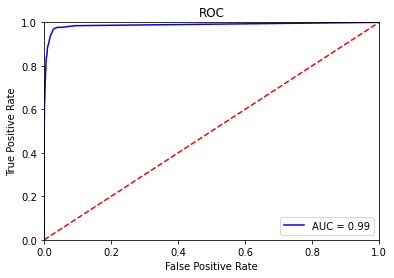

In [201]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [202]:
tn, fp, fn, tp = cfn_scores.copy().reshape(-1)
accuracy = (tp + tn)/(tp + fp + tn + fn)
test_accuracy = accuracy

test_misclassifications = cfn_scores[0][1] + cfn_scores[1][0]
print(f'Test Set Misclassifications: {test_misclassifications}')

Test Set Misclassifications: 112


In [203]:
summary = {
                'Data':  ['Train', 'Test'],
                'Misclassifications': [train_misclassifications, test_misclassifications],
                'Error Rate': [f'{(1-train_accuracy)*100}%', f'{(1-test_accuracy)*100}%'],
                'AUC': [train_auc, test_auc]
               }

summary_df = pd.DataFrame(summary)
summary_df.set_index('Data')

,Misclassifications,Error Rate,AUC
Data,,,
Train,0,0.0%,1.000000
Test,112,0.736842105263158%,0.988153


In [204]:
oob_error = 1 - model.oob_score_


summary_data = {
                'Parameter':  ['Test Error', 'Out of Bag Error'],
                'Value': [f'{(1-test_accuracy)*100}%', f'{oob_error*100}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameter')

,Value
Parameter,
Test Error,0.736842105263158%
Out of Bag Error,0.8059475640646019%


### Comparisons:

On this data set, the random forest classifier without weights performs better than the one with penalties for imbalanced classes.

## 1e - XGBoost and Model Trees

In [206]:
train_dmatrix = xgb.DMatrix(data = train_X, label = train_Y)


In [209]:
cv = RepeatedStratifiedKFold(n_splits = 5, random_state = 1, n_repeats = 1)

In [210]:
train_errors = []
test_errors = []
alphas = [x for x in range(1, 1001)]

best_alpha = 0
least_error = 1


for alpha in alphas:
    xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = alpha, n_estimators = 10)
    xg_reg.fit(train_X, train_Y)
    score = cross_val_score(xg_reg, train_X, train_Y, scoring='accuracy', cv=cv, n_jobs=-1).mean()
    train_errors.append(1 - score)
    if(train_errors[-1] < least_error):
        best_alpha = alpha
        least_error = train_errors[-1]
    test_Y_pred = xg_reg.predict(test_X)
    test_score = metrics.accuracy_score(test_Y, test_Y_pred)
    test_errors.append(1 - test_score)

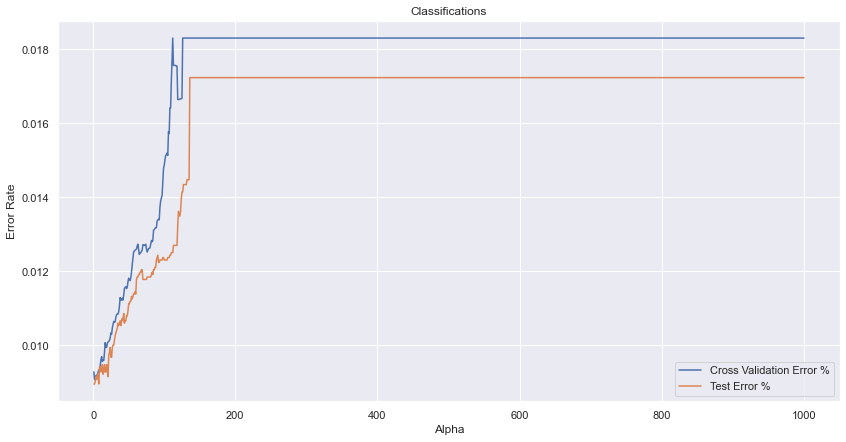

In [211]:
sns.set()

plt.figure(figsize=(14,7))
sns.lineplot(y=train_errors, x=alphas, label="Cross Validation Error Rate")
sns.lineplot(y=test_errors, x=alphas, label="Test Error Rate")
plt.xlabel('Alpha')
plt.ylabel('Error Rate')
plt.title('Classifications')
plt.show()

In [215]:
print(f'The best alpha value is: {best_alpha}')

print(f'The best cross-validated error rate is: {least_error}')

The best alpha value is: 2
The best cross-validated error rate is: 0.009062801650066454


#### Confusion Matrices - Logistic Regression XGBoost

In [219]:
train_y_pred = xg_reg.predict(train_X)

Text(0.5, 257.44, 'Predicted class')

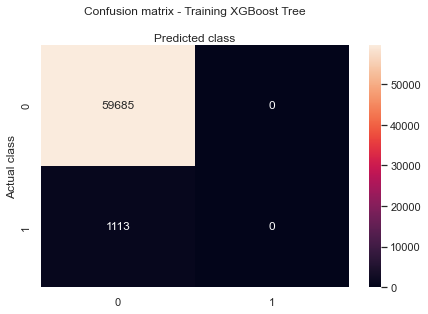

In [225]:
cfn_scores = metrics.confusion_matrix(train_Y, train_y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfn_scores), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Training XGBoost Tree', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [227]:
probabilities = xg_reg.predict_proba(train_X)
predictions = probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(train_Y, predictions)
roc_auc = metrics.auc(fpr, tpr)
train_auc = roc_auc

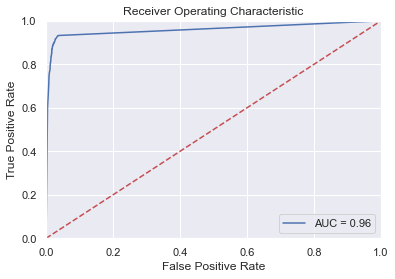

In [228]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [230]:
tn, fp, fn, tp = cfn_scores.copy().reshape(-1)
accuracy = (tp+tn)/(tp + fp + tn+ fn)
train_accuracy = accuracy

train_misclassifs = cfn_scores[0][1] + cfn_scores[1][0]
print(f'Training set Misclassifications: {train_misclassifs}')

Training set Misclassifications: 1113


In [231]:
test_y_pred = xg_reg.predict(test_X)


Text(0.5, 257.44, 'Predicted class')

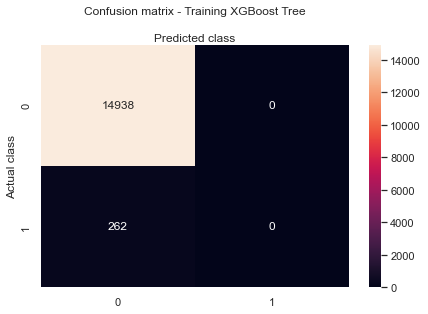

In [232]:
cfn_scores = metrics.confusion_matrix(test_Y, test_y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfn_scores), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Test XGBoost Tree', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

** Typo - above is test XGBoost CF matrix

In [235]:
probabilities = xg_reg.predict_proba(test_X)
predictions = probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_Y, predictions)
roc_auc = metrics.auc(fpr, tpr)
test_auc = roc_auc

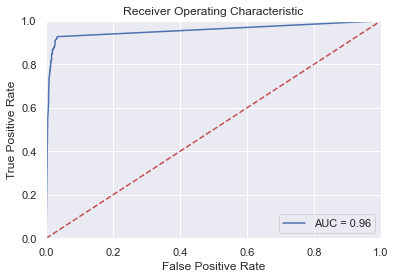

In [236]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [237]:
tn, fp, fn, tp = cfn_scores.copy().reshape(-1)
accuracy = (tp+tn)/(tp + fp + tn+ fn)
test_accuracy = accuracy

test_misclassifs = cfn_scores[0][1] + cfn_scores[1][0]
print(f'Test set Misclassifications: {test_misclassifs}')

Training set Misclassifications: 262


Above should say testing set

In [240]:
summary = {
                'Data':  ['Train', 'Test'],
                'Misclassifications': [train_misclassifs, test_misclassifs],
                'Error Rate': [f'{(1-train_accuracy)*100}%', f'{(1-test_accuracy)*100}%'],
                'AUC': [train_auc, test_auc]
               }

summary_df = pd.DataFrame(summary)
summary_df.set_index('Data')

,Misclassifications,Error Rate,AUC
Data,,,
Train,1113,1.83065232408961%,0.956361
Test,262,1.7236842105263106%,0.956361


## 1f - SMOTE w/ XGBoost L1 penalized logistic regression

Reference: https://www.kaggle.com/code/qianchao/smote-with-imbalance-data/notebook

In [246]:
sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_resample(train_X, train_Y.values.ravel())

In [250]:
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

After OverSampling, counts of label '1': 59685
After OverSampling, counts of label '0': 59685


In [253]:
train_errors = []
test_errors = []
alphas = [x for x in range(1, 5)]

best_alpha = 0
least_error = 1


for alpha in alphas:
    print(alpha)
    xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = alpha, n_estimators = 10)
    xg_reg.fit(X_train_res, Y_train_res)
    score = cross_val_score(xg_reg, X_train_res, Y_train_res, scoring='accuracy', cv=cv, n_jobs=-1).mean()
    train_errors.append(1 - score)
    if(train_errors[-1] < least_error):
        best_alpha = alpha
        least_error = train_errors[-1]
    test_Y_pred = xg_reg.predict(test_X)
    test_score = metrics.accuracy_score(test_Y, test_Y_pred)
    test_errors.append(1 - test_score)

1
2
3
4


### Train SMOTE

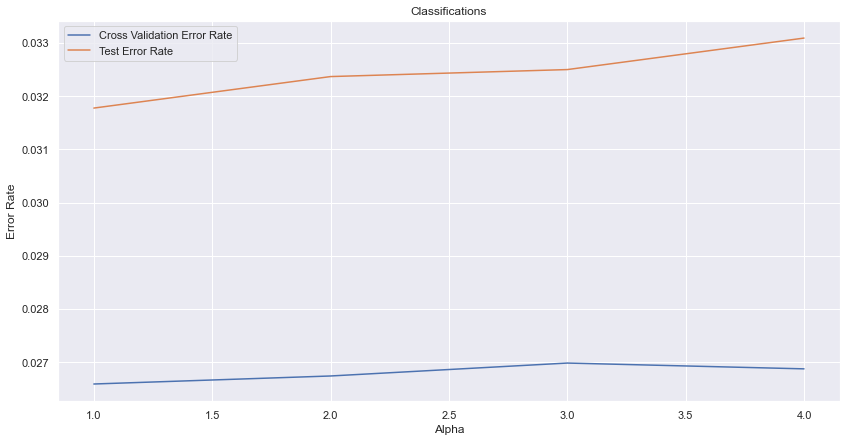

In [254]:
sns.set()

plt.figure(figsize=(14,7))
sns.lineplot(y=train_errors, x=alphas, label="Cross Validation Error Rate")
sns.lineplot(y=test_errors, x=alphas, label="Test Error Rate")
plt.xlabel('Alpha')
plt.ylabel('Error Rate')
plt.title('Classifications')
plt.show()

In [255]:
print(f'The best alpha value is: {best_alpha}')

print(f'The best cross-validated error rate is: {least_error}')

The best alpha value is: 1
The best cross-validated error rate is: 0.026589595375722475


In [266]:
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = best_alpha, n_estimators = 10)
xg_reg.fit(X_train_res, Y_train_res)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='reg:logistic', predictor='auto',
              random_state=0, ...)

In [267]:
train_y_pred = xg_reg.predict(X_train_res)

Text(0.5, 257.44, 'Predicted class')

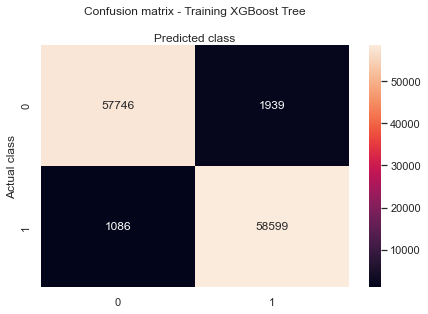

In [268]:
cfn_scores = metrics.confusion_matrix(Y_train_res, train_y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfn_scores), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Training XGBoost Tree', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [269]:
probabilities = xg_reg.predict_proba(X_train_res)
predictions = probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train_res, predictions)
roc_auc = metrics.auc(fpr, tpr)
train_auc = roc_auc

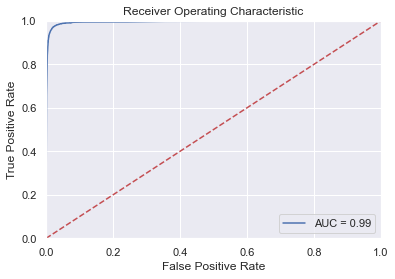

In [270]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [271]:
tn, fp, fn, tp = cfn_scores.copy().reshape(-1)
accuracy = (tp+tn)/(tp + fp + tn+ fn)
train_accuracy = accuracy

train_misclassifs = cfn_scores[0][1] + cfn_scores[1][0]
print(f'Training set Misclassifications: {train_misclassifs}')

Training set Misclassifications: 3025


### Test SMOTE

In [272]:
test_y_pred = xg_reg.predict(test_X)


Text(0.5, 257.44, 'Predicted class')

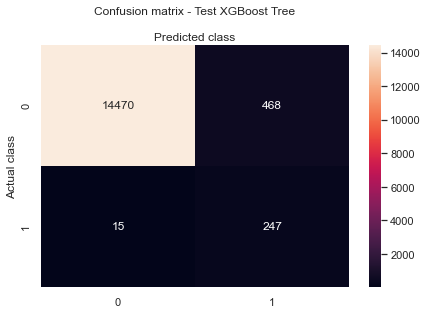

In [273]:
cfn_scores = metrics.confusion_matrix(test_Y, test_y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfn_scores), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Test XGBoost Tree', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [274]:
probabilities = xg_reg.predict_proba(test_X)
predictions = probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_Y, predictions)
roc_auc = metrics.auc(fpr, tpr)
test_auc = roc_auc

In [275]:
tn, fp, fn, tp = cfn_scores.copy().reshape(-1)
accuracy = (tp+tn)/(tp + fp + tn+ fn)
test_accuracy = accuracy

test_misclassifs = cfn_scores[0][1] + cfn_scores[1][0]
print(f'Test set Misclassifications: {test_misclassifs}')

Test set Misclassifications: 483


In [276]:
summary = {
                'Data':  ['Train', 'Test'],
                'Misclassifications': [train_misclassifs, test_misclassifs],
                'Error Rate': [f'{(1-train_accuracy)*100}%', f'{(1-test_accuracy)*100}%'],
                'AUC': [train_auc, test_auc]
               }

summary_df = pd.DataFrame(summary)
summary_df.set_index('Data')

,Misclassifications,Error Rate,AUC
Data,,,
Train,3025,2.5341375554997048%,0.994774
Test,483,3.177631578947371%,0.990962


The uncompensated case: has a lower error rate than SMOTE. Also has no false negatives and no false positives. Therefore, in this case, the uncompensated model outperforms SMOTE.
    
SMOTE was only trained on 5 iterations of alpha due to time and compute resources and it is possible that with additional training, maybe it will be prone to less overfitting.

### ISLR Problems -- see written.pdf 